In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# List of all products
products = ['All', 'American Cheese', 'Bananas', 'Beef Chunks', 'Beef Steaks', 'Bread', 
            'Cheddar Cheese', 'Chicken', 'Eggs', 'Flour', 'Milk', 'Oranges', 'Pork', 'Rice',
            'Strawberries', 'Tomatoes']

In [3]:
# Read CSV to pandas dataframe
df = pd.read_csv('all_products.csv')
df

,product_name,year,month,us_city_average_retail_price
0,Oranges,1980,1,0.339
1,Oranges,1980,2,0.337
2,Oranges,1980,3,0.352
3,Oranges,1980,4,0.349
4,Oranges,1980,5,0.360
...,...,...,...,...
7123,Flour,2022,8,0.549
7124,Flour,2022,9,0.556
7125,Flour,2022,10,0.534
7126,Flour,2022,11,0.524


In [8]:
def get_price_difference(start, end, product_type):

  df = pd.read_csv('all_products.csv')

  # Get product prices between start and end date
  prd_price = df.copy(deep=True)
  prd_price = prd_price.query(f'year >= {start-1} & year <= {end}')

  if product_type == 'All':
    # Rename values in products column to 'All_products' to get the mean of all values later.
    prd_price['product_name'] = 'All_products'

  else:
    prd_price = prd_price.query(f'product_name == \"{product_type}\"')

  # Get the mean of all products prices per month-year
  prd_price = prd_price.groupby(by=['product_name', 'year','month']).mean()
  print('mean')


  # Get average difference of all product prices in period 2016 - 2019
  avg_diff = prd_price.pct_change().reset_index().query(f'year >= {start} & year <= {end}')
  print('average diff')

  # Make datetime from month - year columns
  avg_diff['datetime'] = pd.to_datetime(avg_diff['year'].astype(str) + 
                                        '-' + avg_diff['month'].astype(str),
                                        format='%Y/%m')
  print('datetime')

  # Drop month - year columns
  avg_diff = avg_diff.drop(['month', 'year'], axis=1)

  return avg_diff

In [5]:
# Get average difference the 3 years before covid
pre_covid_prices_all_products = get_price_difference(2017, 2019, 'All')
pre_covid_prices_all_products

<ipython-input-4-631d8235dddb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_price['product_name'] = 'All_products'


      product_name  year  month  us_city_average_retail_price
298   All_products  2016      1                         1.196
299   All_products  2016      2                         1.194
300   All_products  2016      3                         1.188
301   All_products  2016      4                         1.176
302   All_products  2016      5                         1.148
...            ...   ...    ...                           ...
7088  All_products  2019      8                         0.450
7089  All_products  2019      9                         0.449
7090  All_products  2019     10                         0.432
7091  All_products  2019     11                         0.417
7092  All_products  2019     12                         0.429

[719 rows x 4 columns]
mean
average diff
datetime


,product_name,us_city_average_retail_price,datetime
12,All_products,0.000773,2017-01-01
13,All_products,-0.012353,2017-02-01
14,All_products,-0.004403,2017-03-01
15,All_products,-0.006628,2017-04-01
16,All_products,-0.000475,2017-05-01
17,All_products,0.003113,2017-06-01
18,All_products,0.015660,2017-07-01
19,All_products,-0.006899,2017-08-01
20,All_products,0.014913,2017-09-01
21,All_products,-0.004745,2017-10-01


In [6]:
# Get average difference during the 3 years of covid
covid_prices_all_products = get_price_difference(2020, 2022, 'all')

Empty DataFrame
Columns: [product_name, year, month, us_city_average_retail_price]
Index: []
mean
average diff
datetime


All
      product_name  year  month  us_city_average_retail_price
298   All_products  2016      1                         1.196
299   All_products  2016      2                         1.194
300   All_products  2016      3                         1.188
301   All_products  2016      4                         1.176
302   All_products  2016      5                         1.148
...            ...   ...    ...                           ...
7088  All_products  2019      8                         0.450
7089  All_products  2019      9                         0.449
7090  All_products  2019     10                         0.432
7091  All_products  2019     11                         0.417
7092  All_products  2019     12                         0.429

[719 rows x 4 columns]
mean
average diff
datetime
American Cheese
         product_name  year  month  us_city_average_retail_price
3988  American Cheese  2016      1                         4.374
3989  American Cheese  2016      2                     

<ipython-input-4-631d8235dddb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_price['product_name'] = 'All_products'



mean
average diff
datetime
Bread
     product_name  year  month  us_city_average_retail_price
6013        Bread  2016      1                         1.425
6014        Bread  2016      2                         1.407
6015        Bread  2016      3                         1.416
6016        Bread  2016      4                         1.406
6017        Bread  2016      5                         1.382
6018        Bread  2016      6                         1.333
6019        Bread  2016      7                         1.349
6020        Bread  2016      8                         1.341
6021        Bread  2016      9                         1.329
6022        Bread  2016     10                         1.343
6023        Bread  2016     11                         1.362
6024        Bread  2016     12                         1.362
6025        Bread  2017      1                         1.351
6026        Bread  2017      2                         1.358
6027        Bread  2017      3                     

<ipython-input-7-41f7addb92f6>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
<ipython-input-4-631d8235dddb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_price['product_name'] = 'All_products'


      product_name  year  month  us_city_average_retail_price
334   All_products  2019      1                         1.344
335   All_products  2019      2                         1.298
336   All_products  2019      3                         1.346
337   All_products  2019      4                         1.280
338   All_products  2019      5                         1.331
...            ...   ...    ...                           ...
7123  All_products  2022      8                         0.549
7124  All_products  2022      9                         0.556
7125  All_products  2022     10                         0.534
7126  All_products  2022     11                         0.524
7127  All_products  2022     12                         0.522

[692 rows x 4 columns]
mean
average diff
datetime
         product_name  year  month  us_city_average_retail_price
4023  American Cheese  2019      1                         3.922
4024  American Cheese  2019      2                         3.863
4025  Amer

<ipython-input-7-41f7addb92f6>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


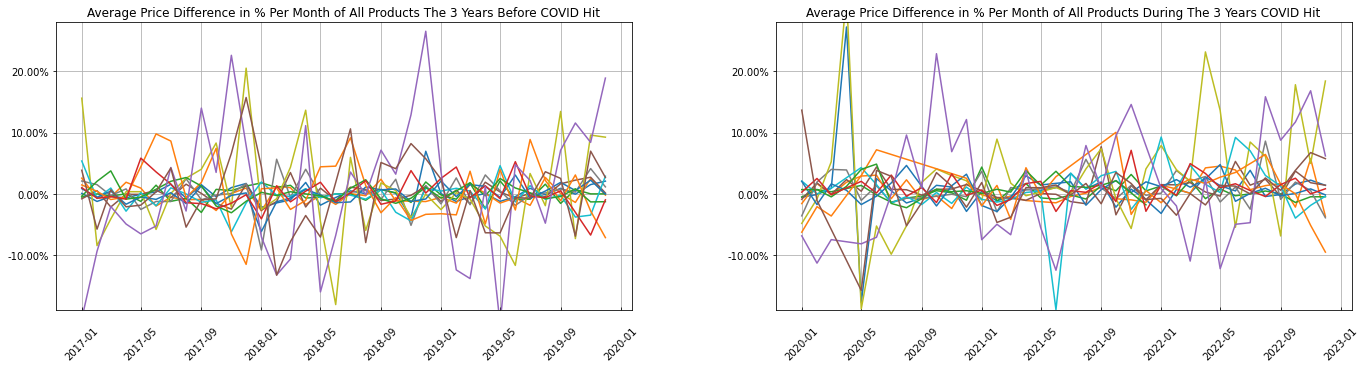

In [7]:
# Creating a canvas to draw
fig = plt.figure(figsize=(10,10))

# Now create an plotting area using add_axes()
# The add_axes takes a list of 4 parameters (left, bottom, width and height). 
# All quantities are in fractions of figure width and height.
ax1 = fig.add_axes([0, 0, .8, 0.40]) 
ax2 = fig.add_axes([1, 0, .8, 0.40]) 

# adding items to the first subplot
for product in products:
  print(product)
  df = get_price_difference(2017, 2019, product)
  ax1.plot(df['datetime'].sort_values(), df['us_city_average_retail_price'])
ax1.grid('on')
ax1.set_ylim([-.19, .28])
ax1.set_title("Average Price Difference in % Per Month of All Products The 3 Years Before COVID Hit")
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax1.tick_params(axis="x", direction="in", rotation=45, pad=15)

# Adding items to the second subplot
for product in products:
  df = get_price_difference(2020, 2022, product)
  ax2.plot(df['datetime'].sort_values(), df['us_city_average_retail_price'])
ax2.grid('on')
ax2.set_ylim([-.19, .28])
ax2.set_title("Average Price Difference in % Per Month of All Products During The 3 Years COVID Hit")
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax2.tick_params(axis="x", direction="in", rotation=45, pad=15)

# draw
plt.show()